<a href="https://colab.research.google.com/github/yamkas/-String-and-Date-Time-Function-in-SQL/blob/master/String_and_Date_%26_Time_Function_(for_student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import sqlite3 as sql

In [ ]:
db = sql.connect('northwind.db')

In [ ]:
# query di bawah akan menampilkan tabel - tabel yang ada di database kita
query = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""

In [ ]:
# buat variabel cursor dari koneksi ke database kita
cursor = db.cursor()

In [ ]:
# menjalankan query dan menampilkan hasil
cursor.execute(query)
print(cursor.fetchall())

[('Suppliers',), ('Shippers',), ('Employees',), ('Customers',), ('Orders',), ('Categories',), ('Products',), ('OrderDetails',)]


In [ ]:
pd.read_sql("SELECT * FROM Employees LIMIT 2;", db)

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1966-12-08 00:00:00.000,2010-05-01 00:00:00.000,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1970-02-19 00:00:00.000,2010-08-14 00:00:00.000,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp


### DATE FUNCTIONS

In [ ]:
#Compute the last day of the current month.
pd.read_sql("SELECT date('now','start of month','+1 month','-1 day');", db)


,"date('now','start of month','+1 month','-1 day')"
0,2024-04-30


In [ ]:
#Compute the date of the first Tuesday in October for the current year.
pd.read_sql("SELECT date('now','start of year','+9 months','weekday 2');", db)

,"date('now','start of year','+9 months','weekday 2')"
0,2024-10-01


In [ ]:
pd.read_sql("SELECT OrderDate, DATE(OrderDate) FROM Orders ORDER BY 2 LIMIT 3;", db)

,OrderDate,DATE(OrderDate)
0,2014-07-04 08:00:00.000,2014-07-04
1,2014-07-05 04:00:00.000,2014-07-05
2,2014-07-08 14:00:00.000,2014-07-08


### TIME FUNCTIONS

In [ ]:
#Compute the current date.
pd.read_sql("SELECT time();", db)

,time()
0,09:14:30


In [ ]:
pd.read_sql("SELECT OrderDate, TIME(OrderDate) FROM Orders ORDER BY 1 LIMIT 3;", db)

,OrderDate,TIME(OrderDate)
0,2014-07-04 08:00:00.000,08:00:00
1,2014-07-05 04:00:00.000,04:00:00
2,2014-07-08 14:00:00.000,14:00:00


### DATETIME FUNCTIONS

In [ ]:
#Compute the date and time given a unix timestamp 3600.
pd.read_sql("SELECT datetime(3600, 'unixepoch', 'localtime');", db)

,"datetime(3600, 'unixepoch', 'localtime')"
0,1970-01-01 01:00:00


In [ ]:
#Compute the date and time given a unix timestamp 1092941466, and compensate for your local timezone.
pd.read_sql("SELECT datetime(1092941466, 'unixepoch', 'localtime');", db)

,"datetime(1092941466, 'unixepoch', 'localtime')"
0,2004-08-19 18:51:06


In [ ]:
pd.read_sql("SELECT OrderDate, DATETIME(OrderDate) FROM Orders ORDER BY 1 LIMIT 3;", db)

,OrderDate,DATETIME(OrderDate)
0,2014-07-04 08:00:00.000,2014-07-04 08:00:00
1,2014-07-05 04:00:00.000,2014-07-05 04:00:00
2,2014-07-08 14:00:00.000,2014-07-08 14:00:00


### JULIANDAY FUNCTIONS

In [ ]:
#Compute the number of seconds since a particular moment in 2004:
pd.read_sql("SELECT julianday('1776-07-10') - julianday('1776-07-04');", db)

,julianday('1776-07-10') - julianday('1776-07-04')
0,6.0


In [ ]:
#Compute the number of days since the signing of the US Declaration of Independence.
pd.read_sql("SELECT julianday('now') - julianday('2022-07-04');", db)

,julianday('now') - julianday('2022-07-04')
0,639.389136


In [ ]:
pd.read_sql("SELECT RequiredDate, OrderDate, julianday(DATE(RequiredDate)) - julianday(DATE(OrderDate)) FROM Orders LIMIT 3;", db)

,RequiredDate,OrderDate,julianday(DATE(RequiredDate)) - julianday(DATE(OrderDate))
0,2014-08-01 00:00:00.000,2014-07-04 08:00:00.000,28.0
1,2014-08-16 00:00:00.000,2014-07-05 04:00:00.000,42.0
2,2014-08-05 00:00:00.000,2014-07-08 15:00:00.000,28.0


### STRFTIME FUNCTIONS

In [ ]:
#Extract Day
pd.read_sql("SELECT strftime('%d','2018-10-11') AS Day;", db)

,Day
0,11


In [ ]:
#Extract Month
pd.read_sql("SELECT strftime('%m','2018-10-11') AS Month;", db)

,Month
0,10


In [ ]:
#Extract Year
pd.read_sql("SELECT strftime('%Y','2018-10-11') AS Year;", db)

,Year
0,2018


In [ ]:
#Extract Hour
pd.read_sql("SELECT Orderdate, strftime('%H',Orderdate) AS Hour FROM Orders LIMIT 3;", db)

,OrderDate,Hour
0,2014-07-04 08:00:00.000,08
1,2014-07-05 04:00:00.000,04
2,2014-07-08 14:00:00.000,14


In [ ]:
#Extract Minute
pd.read_sql("SELECT Orderdate, strftime('%M',Orderdate) AS Minute FROM Orders LIMIT 3;", db)

,OrderDate,Minute
0,2014-07-04 08:00:00.000,00
1,2014-07-05 04:00:00.000,00
2,2014-07-08 14:00:00.000,00


In [ ]:
#Extract Second
pd.read_sql("SELECT Orderdate, strftime('%S',Orderdate) AS Second FROM Orders LIMIT 3;", db)

,OrderDate,Second
0,2014-07-04 08:00:00.000,00
1,2014-07-05 04:00:00.000,00
2,2014-07-08 14:00:00.000,00


# Mini Case

Selamat ! Kamu baru saja diterima bekerja sebagai seorang Jr. Data Analyst di perusahaan Nortwind Traders!. Hari ini adalah hari pertama kamu bekerja, dan manager kamu ingin kamu secara perlahan mengetahui seluk beluk dari perusahaan tempat kamu bekerja. Kamu diminta untuk mengerjakan beberapa tugas berikut menggunakan bantuan SQL yang sudah kamu pelajari sebelumnya.
Tugas kamu adalah membuat query untuk menjawab beberapa tugas yang akan diberikan di bawah ini, kemudian kamu dapat memberikan komentar sesuai dengan hasil query kamu.
Selamat bekerja!!

### Buatlah sintaks untuk memunculkan tabel-tabel di bawah ini:

In [ ]:
pd.read_sql("SELECT * FROM Orders WHERE ShipCountry IN ('Mexico', 'Argentina');", db)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10259,CENTC,4,2014-07-18 16:00:00.000,2014-08-15 00:00:00.000,2014-07-25 00:00:00.000,3,3.25,Centro comercial Moctezuma,Sierras de Granada 9993,México D.F.,None,05022,Mexico
1,10276,TORTU,8,2014-08-08 18:00:00.000,2014-08-22 00:00:00.000,2014-08-14 00:00:00.000,3,13.84,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
2,10293,TORTU,1,2014-08-29 15:00:00.000,2014-09-26 00:00:00.000,2014-09-11 00:00:00.000,3,21.18,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
3,10304,TORTU,1,2014-09-12 06:00:00.000,2014-10-10 00:00:00.000,2014-09-17 00:00:00.000,2,63.79,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
4,10308,ANATR,7,2014-09-18 14:00:00.000,2014-10-16 00:00:00.000,2014-09-24 00:00:00.000,3,1.61,Ana Trujillo Emparedados y helados,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico
5,10319,TORTU,7,2014-10-02 20:00:00.000,2014-10-30 00:00:00.000,2014-10-11 00:00:00.000,3,64.50,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
6,10322,PERIC,7,2014-10-04 01:00:00.000,2014-11-01 00:00:00.000,2014-10-23 00:00:00.000,3,0.40,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,None,05033,Mexico
7,10354,PERIC,8,2014-11-14 03:00:00.000,2014-12-12 00:00:00.000,2014-11-20 00:00:00.000,3,53.80,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,None,05033,Mexico
8,10365,ANTON,3,2014-11-27 00:00:00.000,2014-12-25 00:00:00.000,2014-12-02 00:00:00.000,2,22.00,Antonio Moreno Taquería,Mataderos 2312,México D.F.,None,05023,Mexico
9,10409,OCEAN,3,2015-01-09 08:00:00.000,2015-02-06 00:00:00.000,2015-01-14 00:00:00.000,1,29.83,Océano Atlántico Ltda.,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,None,1010,Argentina


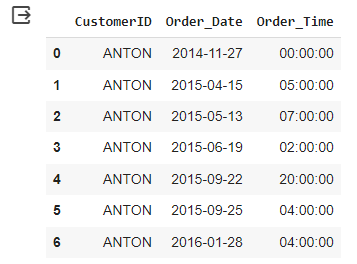

In [ ]:
# MiniCase Nomor 1
query = """
SELECT CustomerID, DATE(OrderDate) as Order_date, TIME(OrderDate) as Order_Time FROM Orders WHERE CustomerID = 'ANTON'
"""
pd.read_sql_query(query, db)

,CustomerID,Order_date,Order_Time
0,ANTON,2014-11-27,00:00:00
1,ANTON,2015-04-15,05:00:00
2,ANTON,2015-05-13,07:00:00
3,ANTON,2015-06-19,02:00:00
4,ANTON,2015-09-22,20:00:00
5,ANTON,2015-09-25,04:00:00
6,ANTON,2016-01-28,04:00:00


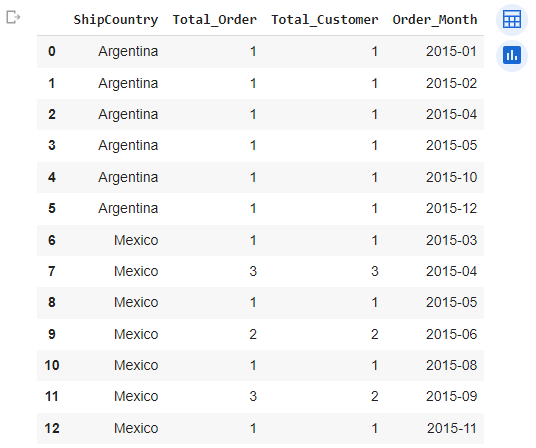

In [ ]:
#MiniCase Nomor 2
query = """
SELECT ShipCountry, COUNT(DISTINCT OrderID) as Total_Order, COUNT(DISTINCT EmployeeID) as Total_Customer, strftime('%Y - %m', OrderDate) as Order_Month
FROM Orders
WHERE ShipCountry IN ('Mexico', 'Argentina')
AND STRFTIME('%Y', OrderDate) = "2015"
GROUP BY 1, 4

"""
pd.read_sql_query(query, db)

,ShipCountry,Total_Order,Total_Customer,Order_Month
0,Argentina,1,1,2015 - 01
1,Argentina,1,1,2015 - 02
2,Argentina,1,1,2015 - 04
3,Argentina,1,1,2015 - 05
4,Argentina,1,1,2015 - 10
5,Argentina,1,1,2015 - 12
6,Mexico,1,1,2015 - 03
7,Mexico,3,3,2015 - 04
8,Mexico,1,1,2015 - 05
9,Mexico,2,2,2015 - 06


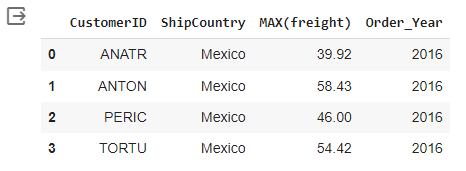

In [ ]:
#MiniCase Nomor 3
query = """
SELECT CustomerID, ShipCountry, MAX(Freight), strftime('%Y', OrderDate) as Order_Year
FROM Orders
WHERE CustomerID IN ('ANATR', 'ANTON', 'PERIC', 'TORTU')
AND STRFTIME('%Y', OrderDate) = "2016"
GROUP BY 1

"""
pd.read_sql_query(query, db)

,CustomerID,ShipCountry,MAX(Freight),Order_Year
0,ANATR,Mexico,39.92,2016
1,ANTON,Mexico,58.43,2016
2,PERIC,Mexico,46.00,2016
3,TORTU,Mexico,54.42,2016


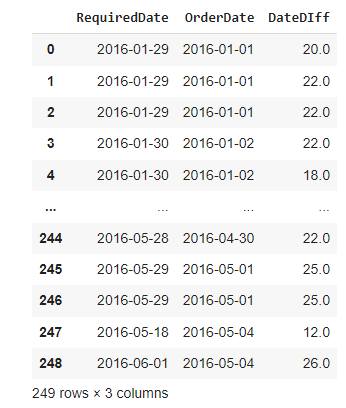

In [ ]:
#Minicase Nomor 4
query = """
SELECT DATE(RequiredDate) as RequiredDate, DATE(OrderDate) as OrderDate, julianday(DATE(RequiredDate)) - julianday(DATE(OrderDate)) as DateDIff
FROM Orders
WHERE STRFTIME('%Y', OrderDate) = "2016"

"""
pd.read_sql_query(query, db)

,RequiredDate,OrderDate,DateDIff
0,2016-01-29,2016-01-01,28.0
1,2016-01-29,2016-01-01,28.0
2,2016-01-29,2016-01-01,28.0
3,2016-01-30,2016-01-02,28.0
4,2016-01-30,2016-01-02,28.0
...,...,...,...
265,2016-06-02,2016-05-05,28.0
266,2016-06-03,2016-05-06,28.0
267,2016-06-03,2016-05-06,28.0
268,2016-06-03,2016-05-06,28.0


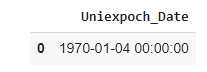

In [ ]:
#MinisCase Nomor 5
pd.read_sql("SELECT datetime(259200, 'unixepoch', 'localtime');", db)

,"datetime(259200, 'unixepoch', 'localtime')"
0,1970-01-04 00:00:00


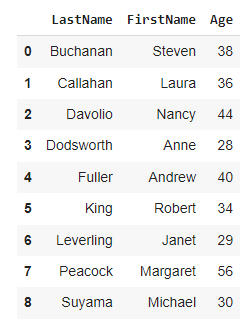

In [ ]:
#MinisCase Nomor 6
query = """
SELECT LastName, FirstName , (DATE(HireDate)) - (DATE(BirthDate)) as Age
FROM Employees
ORDER BY LastName
"""
pd.read_sql_query(query, db)

,LastName,FirstName,Age
0,Buchanan,Steven,38
1,Callahan,Laura,36
2,Davolio,Nancy,44
3,Dodsworth,Anne,28
4,Fuller,Andrew,40
5,King,Robert,34
6,Leverling,Janet,29
7,Peacock,Margaret,56
8,Suyama,Michael,30
